In [ ]:
import pandas as pd

df = pd.read_csv("Final_Merge.csv")
print(df.shape)
df.head()


(450, 43)


,player_id,player_name,team,position,matches_played,minutes_played,passes,shots,goals,assists,...,trending_mentions_7d,sentiment_classification,total_injuries_history,days_injured_last_season,current_injury_status,injury_risk_assessment,avg_recovery_time_days,injury_prone_body_parts,historical_injury_count,days_since_last_injury
0,415,Erling Haaland 414,Manchester City,Defender,40,3480,2764,17,7,0,...,4847,Very Positive,0,178,Out,0.75,89,Hamstring,9,265
1,69,Vinicius Jr 68,Paris Saint-Germain,Forward,40,3240,1965,6,4,1,...,1217,Very Negative,8,211,Minor,0.25,8,Knee,11,145
2,387,Bukayo Saka 386,Manchester United,Defender,40,3360,4144,9,0,7,...,4883,Very Negative,4,292,Minor,0.75,75,NaN,12,69
3,202,Robert Lewandowski 201,Liverpool,Midfielder,40,2440,2686,11,6,2,...,3967,Very Negative,1,233,Out,1.25,30,Shoulder,13,58
4,250,Gavi 249,Chelsea,Midfielder,40,3000,3043,8,7,5,...,1369,Very Negative,7,238,Recovering,0.75,54,NaN,5,185


In [ ]:
df.columns


Index(['player_id', 'player_name', 'team', 'position', 'matches_played',
       'minutes_played', 'passes', 'shots', 'goals', 'assists', 'tackles',
       'interceptions', 'yellow_cards', 'assists_per_match', 'goals_per_match',
       'minutes_per_match', 'defensive_index', 'discipline_index',
       'ball_possession_index', 'performance_score', 'injury_risk_score',
       'market_value_millions', 'market_value_', 'estimated_resale_value',
       'market_value_last_updated', 'contract_end_year',
       'years_remaining_contract', 'twitter_mentions_count',
       'twitter_engagement_rate', 'social_sentiment_score',
       'social_engagement_score', 'public_perception_index',
       'mention_volatility_score', 'trending_mentions_7d',
       'sentiment_classification', 'total_injuries_history',
       'days_injured_last_season', 'current_injury_status',
       'injury_risk_assessment', 'avg_recovery_time_days',
       'injury_prone_body_parts', 'historical_injury_count',
       'days_sinc

In [ ]:
TARGET = "market_value_millions"

drop_cols = [
    "player_id",
    "player_name",
    "team",
    "position"
]

X = df.drop(columns=drop_cols + [TARGET])
y = df[TARGET]


In [ ]:
X = pd.get_dummies(X, drop_first=True)
X.shape


(450, 46)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
!pip install xgboost


In [ ]:
from xgboost import XGBRegressor


In [ ]:
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
sse = np.sum((y_test - y_pred) ** 2)

print(f"R² Score           : {r2:.4f}")
print(f"Accuracy (R² %)    : {r2*100:.2f}%")
print(f"MSE                : {mse:.4f}")
print(f"RMSE               : {rmse:.4f}")
print(f"Sum Squared Error  : {sse:.4f}")


R² Score           : 0.9710
Accuracy (R² %)    : 97.10%
MSE                : 3.5903
RMSE               : 1.8948
Sum Squared Error  : 323.1261


In [ ]:
df.loc[y_test.index, "predicted_market_value_millions"] = y_pred


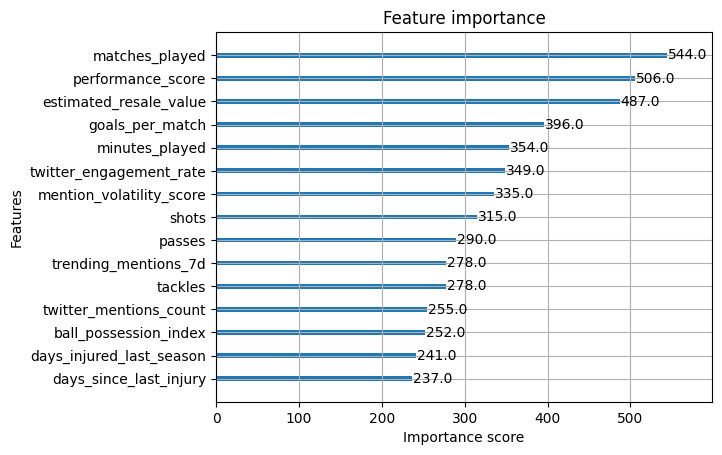

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model, max_num_features=15)
plt.show()


In [ ]:
df.to_csv("Final_Merge_XGBoost_Predictions.csv", index=False)


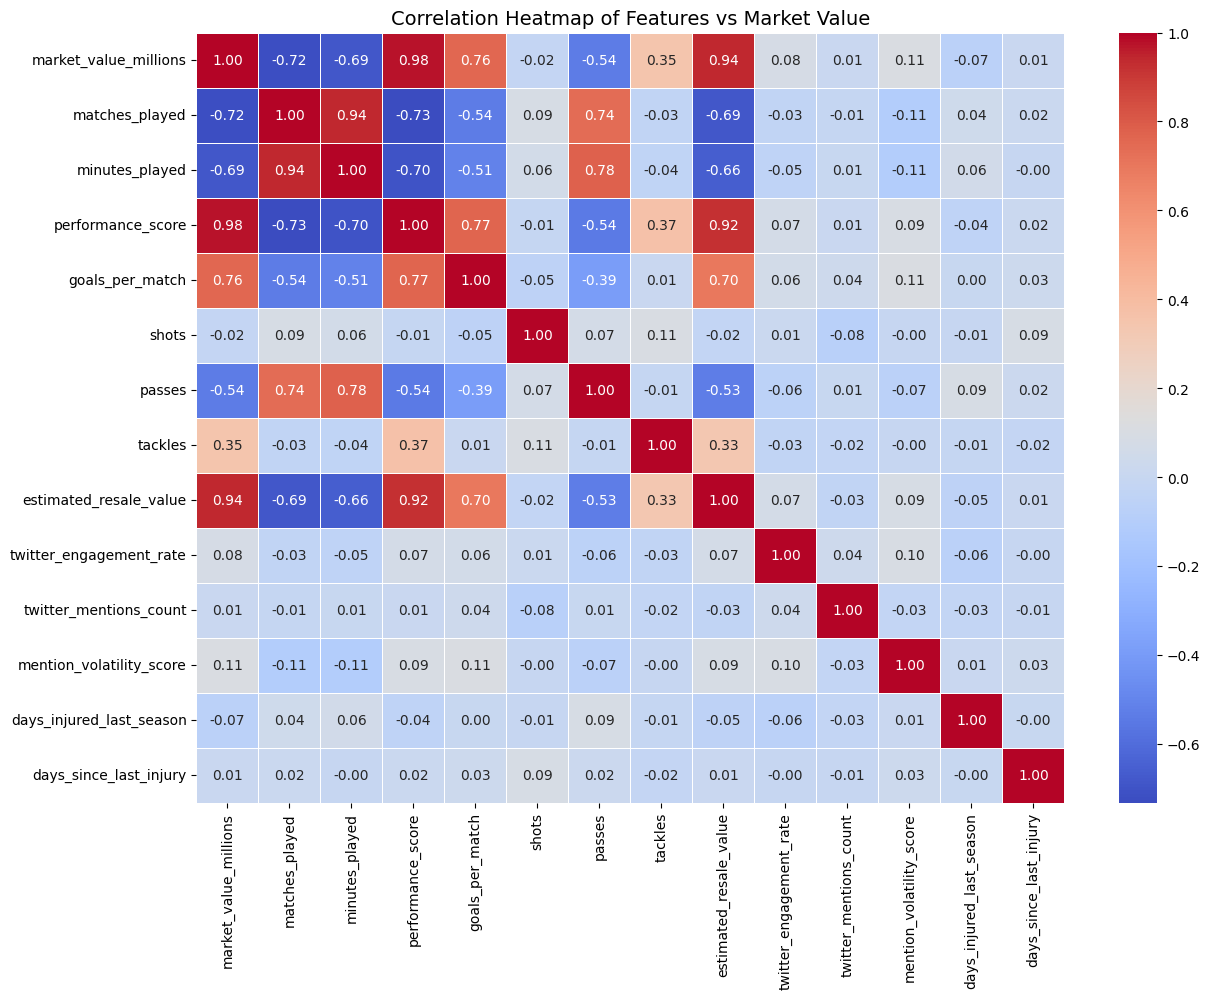

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select important features (based on feature importance)
heatmap_features = [
    "market_value_millions",
    "matches_played",
    "minutes_played",
    "performance_score",
    "goals_per_match",
    "shots",
    "passes",
    "tackles",
    "estimated_resale_value",
    "twitter_engagement_rate",
    "twitter_mentions_count",
    "mention_volatility_score",
    "days_injured_last_season",
    "days_since_last_injury"
]

# Keep only existing columns
heatmap_features = [c for c in heatmap_features if c in df.columns]

# Compute correlation matrix
corr = df[heatmap_features].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Features vs Market Value", fontsize=14)
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("Final_Merge.csv")
df.head()


,player_id,player_name,team,position,matches_played,minutes_played,passes,shots,goals,assists,...,trending_mentions_7d,sentiment_classification,total_injuries_history,days_injured_last_season,current_injury_status,injury_risk_assessment,avg_recovery_time_days,injury_prone_body_parts,historical_injury_count,days_since_last_injury
0,415,Erling Haaland 414,Manchester City,Defender,40,3480,2764,17,7,0,...,4847,Very Positive,0,178,Out,0.75,89,Hamstring,9,265
1,69,Vinicius Jr 68,Paris Saint-Germain,Forward,40,3240,1965,6,4,1,...,1217,Very Negative,8,211,Minor,0.25,8,Knee,11,145
2,387,Bukayo Saka 386,Manchester United,Defender,40,3360,4144,9,0,7,...,4883,Very Negative,4,292,Minor,0.75,75,NaN,12,69
3,202,Robert Lewandowski 201,Liverpool,Midfielder,40,2440,2686,11,6,2,...,3967,Very Negative,1,233,Out,1.25,30,Shoulder,13,58
4,250,Gavi 249,Chelsea,Midfielder,40,3000,3043,8,7,5,...,1369,Very Negative,7,238,Recovering,0.75,54,NaN,5,185


In [ ]:
TARGET = "market_value_millions"

drop_cols = [
    "player_id",
    "player_name",
    "team",
    "position"
]

X = df.drop(columns=drop_cols + [TARGET])
y = df[TARGET]


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=2, min_samples_split=5, n_estimators=300,
                      n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
sse_rf = np.sum((y_test - y_pred_rf) ** 2)

print(f"R² Score           : {r2_rf:.4f}")
print(f"Accuracy (R² %)    : {r2_rf*100:.2f}%")
print(f"MSE                : {mse_rf:.4f}")
print(f"RMSE               : {rmse_rf:.4f}")
print(f"Sum Squared Error  : {sse_rf:.4f}")


R² Score           : 0.9730
Accuracy (R² %)    : 97.30%
MSE                : 3.3423
RMSE               : 1.8282
Sum Squared Error  : 300.8074


In [ ]:
df.loc[y_test.index, "predicted_market_value_rf"] = y_pred_rf


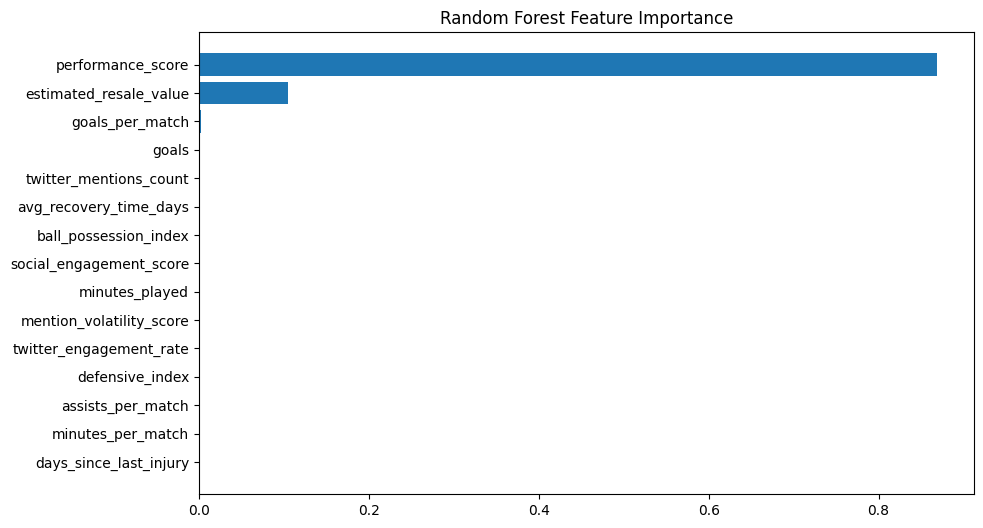

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("Final_Merge.csv")
df.head()


,player_id,player_name,team,position,matches_played,minutes_played,passes,shots,goals,assists,...,trending_mentions_7d,sentiment_classification,total_injuries_history,days_injured_last_season,current_injury_status,injury_risk_assessment,avg_recovery_time_days,injury_prone_body_parts,historical_injury_count,days_since_last_injury
0,415,Erling Haaland 414,Manchester City,Defender,40,3480,2764,17,7,0,...,4847,Very Positive,0,178,Out,0.75,89,Hamstring,9,265
1,69,Vinicius Jr 68,Paris Saint-Germain,Forward,40,3240,1965,6,4,1,...,1217,Very Negative,8,211,Minor,0.25,8,Knee,11,145
2,387,Bukayo Saka 386,Manchester United,Defender,40,3360,4144,9,0,7,...,4883,Very Negative,4,292,Minor,0.75,75,NaN,12,69
3,202,Robert Lewandowski 201,Liverpool,Midfielder,40,2440,2686,11,6,2,...,3967,Very Negative,1,233,Out,1.25,30,Shoulder,13,58
4,250,Gavi 249,Chelsea,Midfielder,40,3000,3043,8,7,5,...,1369,Very Negative,7,238,Recovering,0.75,54,NaN,5,185


In [ ]:
TARGET = "market_value_millions"

drop_cols = [
    "player_id",
    "player_name",
    "team",
    "position"
]

X = df.drop(columns=drop_cols + [TARGET])
y = df[TARGET]


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [ ]:
!pip install lightgbm


In [ ]:
from lightgbm import LGBMRegressor


In [ ]:
lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm_model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2342
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 44
[LightGBM] [Info] Start training from score 16.596303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, n_estimators=500,
              random_state=42, subsample=0.8)

In [ ]:
y_pred_lgbm = lgbm_model.predict(X_test)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
sse_lgbm = np.sum((y_test - y_pred_lgbm) ** 2)

print(f"R² Score           : {r2_lgbm:.4f}")
print(f"Accuracy (R² %)    : {r2_lgbm*100:.2f}%")
print(f"MSE                : {mse_lgbm:.4f}")
print(f"RMSE               : {rmse_lgbm:.4f}")
print(f"Sum Squared Error  : {sse_lgbm:.4f}")


R² Score           : 0.9465
Accuracy (R² %)    : 94.65%
MSE                : 6.6161
RMSE               : 2.5722
Sum Squared Error  : 595.4472


In [ ]:
df.loc[y_test.index, "predicted_market_value_lgbm"] = y_pred_lgbm


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Final_Merge.csv")
df.head()


,player_id,player_name,team,position,matches_played,minutes_played,passes,shots,goals,assists,...,trending_mentions_7d,sentiment_classification,total_injuries_history,days_injured_last_season,current_injury_status,injury_risk_assessment,avg_recovery_time_days,injury_prone_body_parts,historical_injury_count,days_since_last_injury
0,415,Erling Haaland 414,Manchester City,Defender,40,3480,2764,17,7,0,...,4847,Very Positive,0,178,Out,0.75,89,Hamstring,9,265
1,69,Vinicius Jr 68,Paris Saint-Germain,Forward,40,3240,1965,6,4,1,...,1217,Very Negative,8,211,Minor,0.25,8,Knee,11,145
2,387,Bukayo Saka 386,Manchester United,Defender,40,3360,4144,9,0,7,...,4883,Very Negative,4,292,Minor,0.75,75,NaN,12,69
3,202,Robert Lewandowski 201,Liverpool,Midfielder,40,2440,2686,11,6,2,...,3967,Very Negative,1,233,Out,1.25,30,Shoulder,13,58
4,250,Gavi 249,Chelsea,Midfielder,40,3000,3043,8,7,5,...,1369,Very Negative,7,238,Recovering,0.75,54,NaN,5,185


In [ ]:
target = "market_value_millions"

X = df.drop(columns=["player_id", "player_name", target])
y = df[target]


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in X.select_dtypes(include="object").columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

gbr.fit(X_train_scaled, y_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=300, random_state=42)

In [ ]:
from sklearn.ensemble import VotingRegressor

ensemble = VotingRegressor(
    estimators=[
        ("rf", rf),
        ("gbr", gbr)
    ]
)

ensemble.fit(X_train_scaled, y_train)


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(n_estimators=500, n_jobs=-1,
                                                   random_state=42)),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       n_estimators=300,
                                                       random_state=42))])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_ensemble = ensemble.predict(X_test_scaled)

r2_ensemble = r2_score(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, y_pred_ensemble))

print("ENSEMBLE RESULTS")
print("R2 Score:", r2_ensemble)
print("RMSE:", rmse_ensemble)


ENSEMBLE RESULTS
R2 Score: 0.9704463773459514
RMSE: 1.9119791091504186
